In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Round 1

In [2]:
price_0 = pd.read_csv('../data/raw/round_1/prices_round_1_day_-2.csv', delimiter=';')
price_1 = pd.read_csv('../data/raw/round_1/prices_round_1_day_-1.csv', delimiter=';')
price_2 = pd.read_csv('../data/raw/round_1/prices_round_1_day_0.csv', delimiter=';')

In [3]:
price_0 = price_0[price_0['product'] == 'RAINFOREST_RESIN']
price_1 = price_1[price_1['product'] == 'RAINFOREST_RESIN']
price_2 = price_2[price_2['product'] == 'RAINFOREST_RESIN']

In [4]:
trades_0 = pd.read_csv('../data/raw/round_1/trades_round_1_day_-2.csv', delimiter=';')
trades_1 = pd.read_csv('../data/raw/round_1/trades_round_1_day_-1.csv', delimiter=';')
trades_2 = pd.read_csv('../data/raw/round_1/trades_round_1_day_0.csv', delimiter=';')

In [5]:
trades_0 = trades_0[trades_0['symbol'] == 'RAINFOREST_RESIN']
trades_1 = trades_1[trades_1['symbol'] == 'RAINFOREST_RESIN']
trades_2 = trades_2[trades_2['symbol'] == 'RAINFOREST_RESIN']

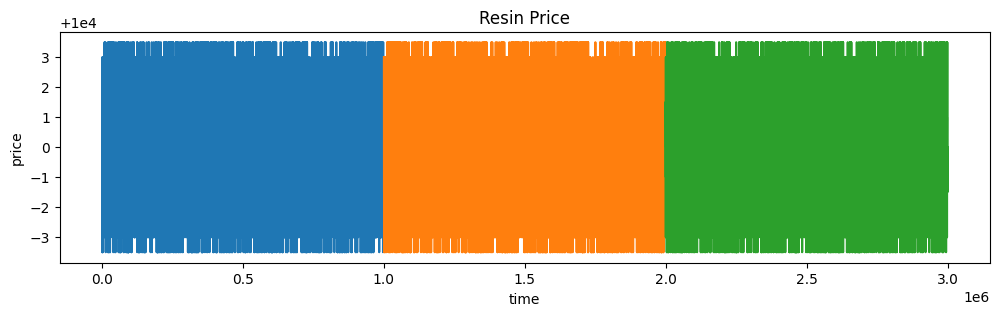

In [6]:
plt.figure(figsize=(12, 3))
plt.plot(price_0['timestamp'], price_0['mid_price'])
plt.plot(price_1['timestamp'] + 1000000, price_1['mid_price'])
plt.plot(price_2['timestamp'] + 2000000, price_2['mid_price'])
plt.title('Resin Price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [7]:
prices = pd.concat([price_0, price_1, price_2], axis=0).reset_index(drop=True)
trades = pd.concat([trades_0, trades_1, trades_2], axis=0).reset_index(drop=True)

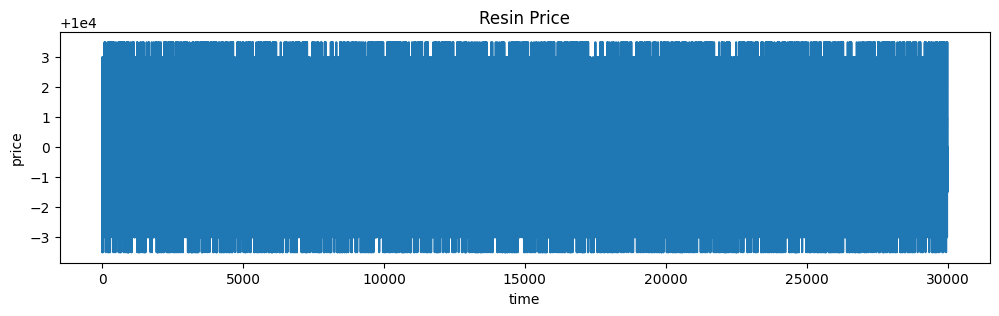

In [8]:
plt.figure(figsize=(12, 3))
plt.plot(prices['mid_price'])
plt.title('Resin Price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

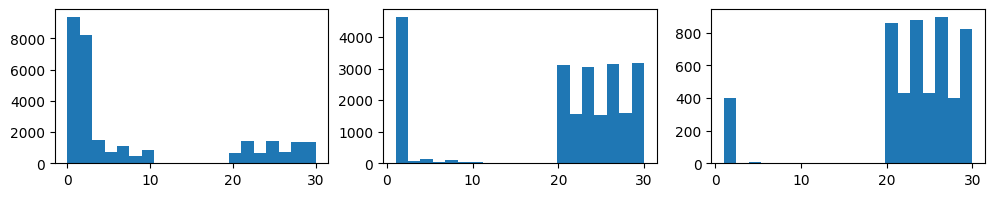

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))
ax[0].hist(prices['bid_volume_1'], bins=20)
ax[1].hist(prices['bid_volume_2'], bins=20)
ax[2].hist(prices['bid_volume_3'], bins=20)
plt.show()

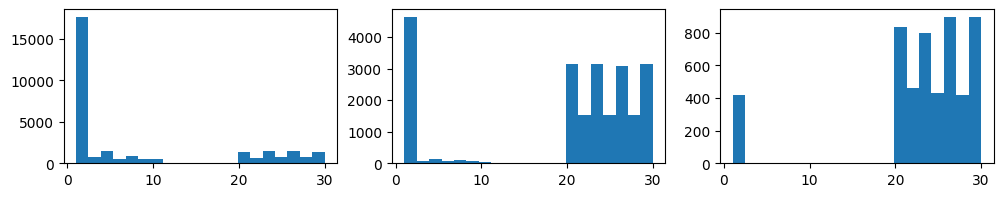

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 2))
ax[0].hist(prices['ask_volume_1'], bins=20)
ax[1].hist(prices['ask_volume_2'], bins=20)
ax[2].hist(prices['ask_volume_3'], bins=20)
plt.show()

In [13]:
price_0.shape[0], price_0[price_0['bid_price_1'] > 10000].shape[0], price_0[price_0['bid_price_2'] > 10000].shape[0]

(10000, 854, 0)

In [14]:
price_0.shape[0], price_0[price_0['ask_price_1'] < 10000].shape[0], price_0[price_0['ask_price_2'] < 10000].shape[0]

(10000, 858, 0)

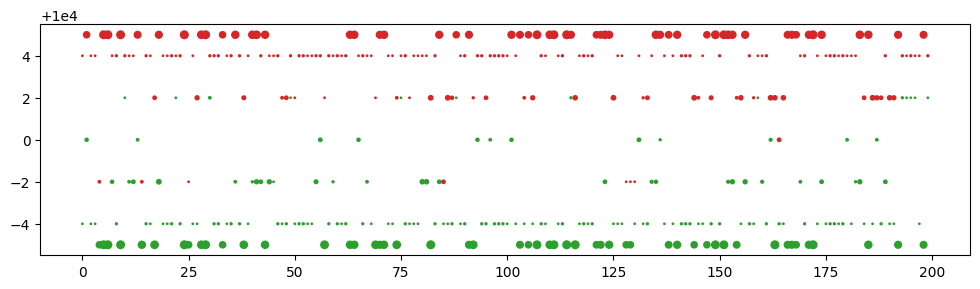

In [16]:
plt.figure(figsize=(12, 3))
plt.scatter(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['bid_price_1'], s=price_0[:200]['bid_volume_1'], c='tab:green')
# plt.scatter(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['bid_price_2'], s=price_0[:200]['bid_volume_2'], c='tab:green')
# plt.scatter(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['bid_price_3'], s=price_0[:200]['bid_volume_3'], c='tab:green')
plt.scatter(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['ask_price_1'], s=price_0[:200]['ask_volume_1'], c='tab:red')
# plt.scatter(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['ask_price_2'], s=price_0[:200]['ask_volume_2'], c='tab:red')
# plt.scatter(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['ask_price_3'], s=price_0[:200]['ask_volume_3'], c='tab:red')
plt.show()

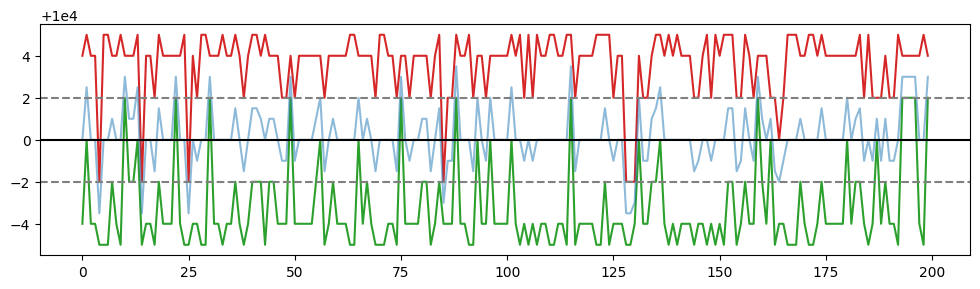

In [31]:
plt.figure(figsize=(12, 3))
plt.plot(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['bid_price_1'], c='tab:green')
# plt.plot(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['bid_price_2'], c='tab:green', alpha=0.5)
# plt.plot(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['bid_price_3'], c='tab:green', alpha=0.5)
plt.plot(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['ask_price_1'], c='tab:red')
# plt.plot(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['ask_price_2'], c='tab:red', alpha=0.5)
# plt.plot(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['ask_price_3'], c='tab:red', alpha=0.5)
plt.plot(price_0.iloc[:200]['timestamp']//100, price_0.iloc[:200]['mid_price'], c='tab:blue', alpha=0.5)
plt.axhline(10000, c='k')
plt.axhline(9998, c='gray', linestyle='dashed')
plt.axhline(10002, c='gray', linestyle='dashed')
plt.show()

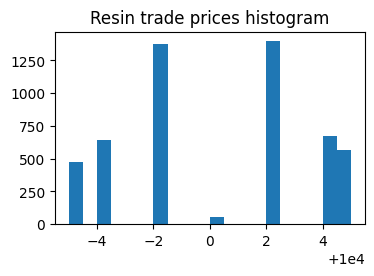

In [31]:
plt.figure(figsize=(4, 2.5))
plt.hist(trades_resin['price'], bins=20, weights=trades_resin['quantity'])
plt.title('Resin trade prices histogram')
plt.show()

In [39]:
model = ARIMA(train_logr, order=(0, 0, 1))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(0, 0, 1)   Log Likelihood                6671.914
Date:                Mon, 07 Apr 2025   AIC                         -13337.828
Time:                        15:04:39   BIC                         -13323.108
Sample:                             0   HQIC                        -13332.233
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.412e-06   3.66e-06     -0.385      0.700   -8.59e-06    5.77e-06
ma.L1         -0.6284      0.027    -22.947      0.000      -0.682      -0.575
sigma2      9.432e-08   3.64e-09     25.891      0.0

C:\Users\aeali\PycharmProjects\imc-prosperity-3\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
result.params

array([-1.41204384e-06, -6.28382306e-01,  9.43236625e-08])

In [43]:
errs = [test_logr[0] - 0]
preds = [0]
for i in range(1, len(test_logr)):
    pred = ma_model(epsilon_prev=errs[i-1], const=result.params[0], theta=result.params[1], sigma2=result.params[2])
    err = test_logr[i] - pred
    preds.append(pred)
    errs.append(err)

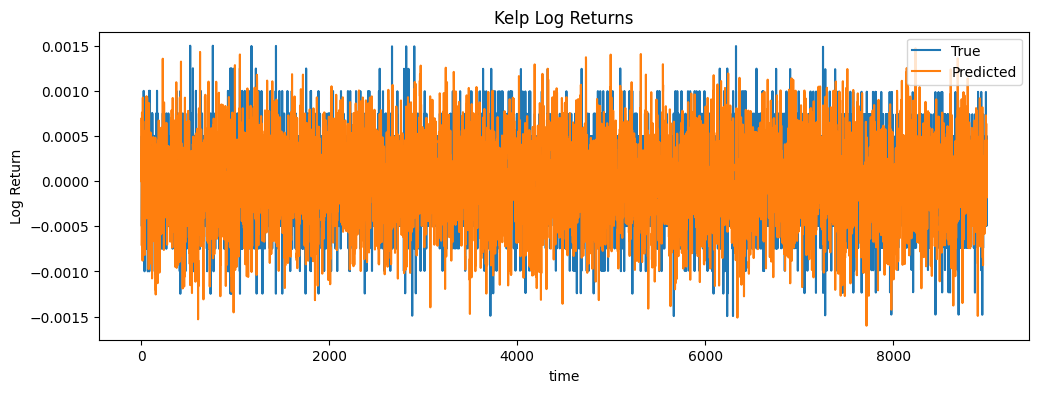

In [44]:
plt.figure(figsize=(12, 4))
plt.plot(test_logr, label='True')
plt.plot(preds, label='Predicted')
plt.title('Kelp Log Returns')
plt.xlabel('time')
plt.ylabel('Log Return')
plt.legend()
plt.show()

In [46]:
pred_price = test[:-1] * np.exp(preds)

In [47]:
err = test[1:] - pred_price
rmse = np.mean(err ** 2) ** 0.5
print(rmse)

1.0183329077258367


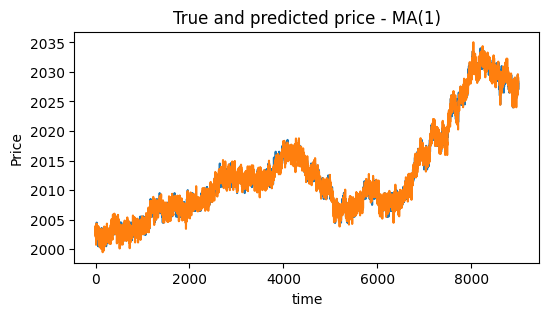

In [48]:
plt.figure(figsize=(6, 3))
plt.plot(test[1:])
plt.plot(pred_price)
plt.title('True and predicted price - MA(1)')
plt.xlabel('time')
plt.ylabel('Price')
plt.show()

# Round 5

In [2]:
price_0 = pd.read_csv('../data/raw/round_5/prices_round_5_day_2.csv', delimiter=';')
price_1 = pd.read_csv('../data/raw/round_5/prices_round_5_day_3.csv', delimiter=';')
price_2 = pd.read_csv('../data/raw/round_5/prices_round_5_day_4.csv', delimiter=';')

price_0 = price_0[price_0['product'] == 'RAINFOREST_RESIN']
price_1 = price_1[price_1['product'] == 'RAINFOREST_RESIN']
price_2 = price_2[price_2['product'] == 'RAINFOREST_RESIN']

trades_0 = pd.read_csv('../data/raw/round_5/trades_round_5_day_2.csv', delimiter=';')
trades_1 = pd.read_csv('../data/raw/round_5/trades_round_5_day_3.csv', delimiter=';')
trades_2 = pd.read_csv('../data/raw/round_5/trades_round_5_day_4.csv', delimiter=';')

trades_0 = trades_0[trades_0['symbol'] == 'RAINFOREST_RESIN']
trades_1 = trades_1[trades_1['symbol'] == 'RAINFOREST_RESIN']
trades_2 = trades_2[trades_2['symbol'] == 'RAINFOREST_RESIN']

prices = pd.concat([price_0, price_1, price_2], axis=0).reset_index(drop=True)
trades = pd.concat([trades_0, trades_1, trades_2], axis=0).reset_index(drop=True)

In [3]:
bots = list(trades['buyer'].unique())

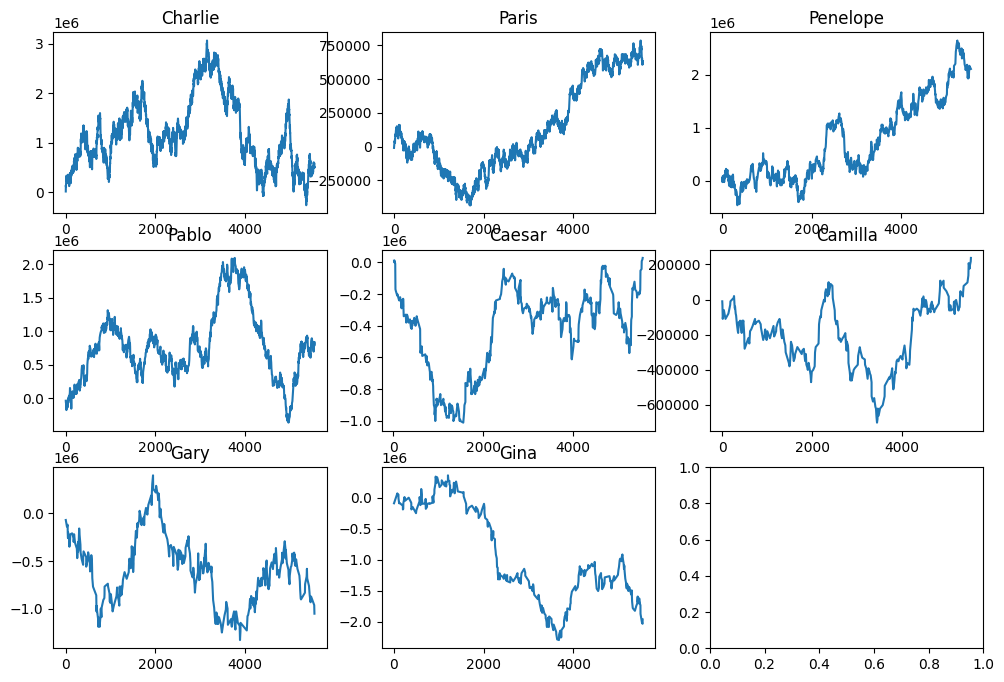

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for bot, ax in zip(bots, axes.flat):
    bot_trades = trades[(trades['buyer'] == bot) | (trades['seller'] == bot)]
    pnl = bot_trades.apply(lambda x: x['price'] * x['quantity'] if x['buyer'] == bot else -x['price'] * x['quantity'], axis=1)
    pnl = pnl.cumsum()
    ax.plot(pnl)
    ax.set_title(bot)
plt.show()